# [Introduction to Data Science: A Comp-Math-Stat Approach](https://lamastex.github.io/scalable-data-science/as/2019/)
## YOIYUI001, Summer 2019 
&copy;2019 Raazesh Sainudiin. [Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)


<h1>Transmission Process</h1>
<h2>
2015 Raazesh Sainudiin
</h2>
<p>
This is code accompanying the technical report 'The Transmission Process' by Raazesh Sainudiin and David Welch. The code is for clarity and simplicity of implementation (it is not efficient for large scale simulations).
</p>

See [https://doi.org/10.1016/j.jtbi.2016.07.038](https://doi.org/10.1016/j.jtbi.2016.07.038) for the published paper.

In [1]:
def CountsDict(X):
    '''convert a list X into a Dictionary of counts or frequencies'''
    CD = {}
    for x in X:
        CD[x] = (CD[x] + 1) if (x in CD) else 1
    return CD

def markAsInfected(C,v,m):
    '''mark node v as infected with marker m on each of the incoming edges of v in SICN C'''
    for e in C.incoming_edge_iterator([v]):
        C.set_edge_label(e[0],e[1],m)

def susceptibleOutEdges(C,vs):
    '''return the the susceptible outedges of node v in vs in SICN C'''
    SOE = [e for e in C.outgoing_edge_iterator(vs) if e[2]==None]
    return SOE

def growTransmissionTree(Ttree, pDict, z, infector, infectee):
    '''grow the transmission tree Ttree and update pathsDict pDict by adding the
        z-th infection event with infector -> infectee '''
    LBT = LabelledBinaryTree
    newSubTree = LBT([LBT([None,None], label=infector), LBT([None, None], label=infectee)], label=z).clone()
    path2Infector = pDict[infector]
    if z==1:
        Ttree = newSubTree
    else:
        Ttree[tuple(path2Infector)] =newSubTree
    #print ascii_art(Ttree)
    pDict[infector]=path2Infector+[0]
    pDict[infectee]=path2Infector+[1]
    pDict[z]=path2Infector
    return Ttree

def forgetLeafLabels(T):
    '''return the transmission tree T with all leaf labels set to 0'''
    leafLabelSet=set(T.leaf_labels())
    leafUnlabelledT=T.map_labels(lambda z:0 if (z in leafLabelSet) else z)
    return leafUnlabelledT

def forgetAllLabels(T):
    '''return the transmission tree T with all node labels removed'''
    return T.shape()

def justTree(T):
    '''return the transmission tree T as nonplanar unranked unlabelled tree'''
    return  Graph(T.shape().to_undirected_graph(),immutable=True)

def transmissionProcessTC(C,initialI):
    '''return transmission tree outcome of the DTDS transmission MC on SICN C with initial infection at node initialI'''
    #initialisation of SICN
    z=0 # infection event count
    markAsInfected(C,initialI,'infected')
    infectedIs = [initialI]
    popSize=C.order()
    # initialisation of Transmission Tree
    pathsDict={} # dictionary of nodes -> paths from root in tree
    LBT = LabelledBinaryTree
    # individuals in tree are labelled by "i"+str(integer_label)
    T = LBT([None,None],label="i"+str(initialI)).clone()
    pathsDict["i"+str(initialI)]=[]
    while (len(infectedIs) < popSize):
        z=z+1 # increment infection event count
        currentSOE = susceptibleOutEdges(C,infectedIs)
        numberInfected=len(currentSOE)
        nextEdge = currentSOE[randrange(0,numberInfected)]
        C.set_edge_label(nextEdge[0],nextEdge[1],z)
        infectedIs.append(nextEdge[1])
        markAsInfected(C,nextEdge[1],'inf')
        T=growTransmissionTree(T, pathsDict, z, "i"+str(nextEdge[0]),"i"+str(nextEdge[1]))
        #print "step z = ",z; print ascii_art(T); print "--------------------"
    return T.as_ordered_tree(with_leaves=False)

# Three example host contact networks

<h2>
    SI Contact Network is the Complete Graph
</h2>
<p>
    Let the SICN be the complete graph.  We get the distribution of transmission trees at various resolutions next.
</p>

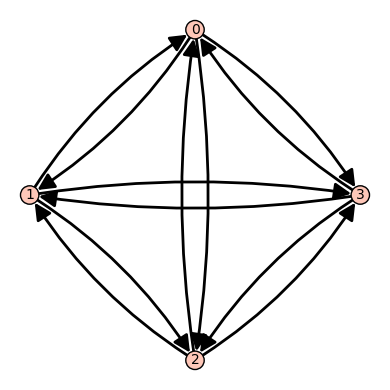

In [2]:
graphs.CompleteGraph(4).to_directed().show()

In [3]:
# demo
transmissionProcessTC(graphs.CompleteGraph(4).to_directed(),0)

1[2[3[i0[], i2[]], i1[]], i3[]]

In [4]:
ts=[transmissionProcessTC(graphs.CompleteGraph(4).to_directed(),0)  for _ in range(100000)]
d=CountsDict(ts)
print len(d)
d

36


{1[i0[], 2[i2[], 3[i3[], i1[]]]]: 2745,
 1[i0[], 2[i2[], 3[i1[], i3[]]]]: 2725,
 1[i0[], 2[i3[], 3[i2[], i1[]]]]: 2857,
 1[i0[], 2[i1[], 3[i3[], i2[]]]]: 2821,
 1[i0[], 2[i1[], 3[i2[], i3[]]]]: 2752,
 1[i0[], 2[i3[], 3[i1[], i2[]]]]: 2674,
 1[i0[], 2[3[i1[], i3[]], i2[]]]: 2771,
 1[i0[], 2[3[i3[], i2[]], i1[]]]: 2822,
 1[i0[], 2[3[i2[], i1[]], i3[]]]: 2780,
 1[i0[], 2[3[i2[], i3[]], i1[]]]: 2737,
 1[i0[], 2[3[i1[], i2[]], i3[]]]: 2778,
 1[i0[], 2[3[i3[], i1[]], i2[]]]: 2751,
 1[2[i0[], i1[]], 3[i2[], i3[]]]: 2880,
 1[3[i0[], i3[]], 2[i1[], i2[]]]: 2694,
 1[2[i0[], i2[]], 3[i3[], i1[]]]: 2885,
 1[3[i0[], i1[]], 2[i3[], i2[]]]: 2870,
 1[2[i0[], i1[]], 3[i3[], i2[]]]: 2759,
 1[2[i0[], i3[]], 3[i1[], i2[]]]: 2702,
 1[2[i0[], i3[]], 3[i2[], i1[]]]: 2858,
 1[2[i0[], i2[]], 3[i1[], i3[]]]: 2694,
 1[3[i0[], i2[]], 2[i3[], i1[]]]: 2787,
 1[3[i0[], i3[]], 2[i2[], i1[]]]: 2688,
 1[3[i0[], i2[]], 2[i1[], i3[]]]: 2756,
 1[3[i0[], i1[]], 2[i2[], i3[]]]: 2766,
 1[2[i0[], 3[i3[], i2[]]], i1[]]: 2831,


In [5]:
d=CountsDict([forgetLeafLabels(t) for t in ts])
d

{1[0[], 2[0[], 3[0[], 0[]]]]: 16574,
 1[0[], 2[3[0[], 0[]], 0[]]]: 16639,
 1[3[0[], 0[]], 2[0[], 0[]]]: 16561,
 1[2[0[], 0[]], 3[0[], 0[]]]: 16778,
 1[2[0[], 3[0[], 0[]]], 0[]]: 16701,
 1[2[3[0[], 0[]], 0[]], 0[]]: 16747}

In [6]:
d=CountsDict([forgetAllLabels(t) for t in ts])
d

{[[], [[], [[], []]]]: 16574,
 [[], [[[], []], []]]: 16639,
 [[[], []], [[], []]]: 33339,
 [[[], [[], []]], []]: 16701,
 [[[[], []], []], []]: 16747}

In [7]:
d=CountsDict([justTree(t) for t in ts])
d

{Graph on 7 vertices: 33339, Graph on 7 vertices: 66661}

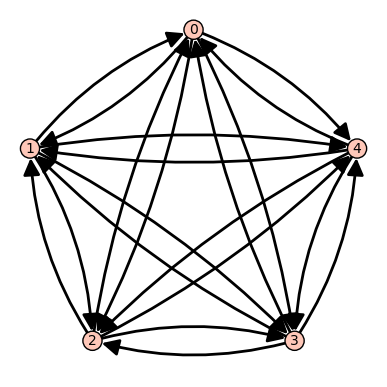

In [8]:
graphs.CompleteGraph(5).to_directed().show()

In [9]:
ts=[transmissionProcessTC(graphs.CompleteGraph(5).to_directed(),0)  for _ in range(100000)]
d=CountsDict([forgetLeafLabels(t) for t in ts])
print len(d)
d

24


{1[0[], 2[0[], 3[0[], 4[0[], 0[]]]]]: 4106,
 1[0[], 2[0[], 3[4[0[], 0[]], 0[]]]]: 4209,
 1[0[], 2[4[0[], 0[]], 3[0[], 0[]]]]: 4096,
 1[0[], 2[3[0[], 0[]], 4[0[], 0[]]]]: 4275,
 1[0[], 2[3[0[], 4[0[], 0[]]], 0[]]]: 4168,
 1[0[], 2[3[4[0[], 0[]], 0[]], 0[]]]: 4165,
 1[4[0[], 0[]], 2[3[0[], 0[]], 0[]]]: 4116,
 1[2[0[], 0[]], 3[0[], 4[0[], 0[]]]]: 4190,
 1[4[0[], 0[]], 2[0[], 3[0[], 0[]]]]: 4213,
 1[3[0[], 0[]], 2[0[], 4[0[], 0[]]]]: 4111,
 1[3[0[], 0[]], 2[4[0[], 0[]], 0[]]]: 4229,
 1[2[0[], 0[]], 3[4[0[], 0[]], 0[]]]: 4131,
 1[2[0[], 3[0[], 0[]]], 4[0[], 0[]]]: 4128,
 1[3[0[], 4[0[], 0[]]], 2[0[], 0[]]]: 4206,
 1[2[0[], 4[0[], 0[]]], 3[0[], 0[]]]: 4184,
 1[2[0[], 3[0[], 4[0[], 0[]]]], 0[]]: 4131,
 1[2[0[], 3[4[0[], 0[]], 0[]]], 0[]]: 4303,
 1[3[4[0[], 0[]], 0[]], 2[0[], 0[]]]: 4147,
 1[2[4[0[], 0[]], 0[]], 3[0[], 0[]]]: 4175,
 1[2[4[0[], 0[]], 3[0[], 0[]]], 0[]]: 4157,
 1[2[3[0[], 0[]], 0[]], 4[0[], 0[]]]: 4117,
 1[2[3[0[], 0[]], 4[0[], 0[]]], 0[]]: 4164,
 1[2[3[0[], 4[0[], 0[]]], 0[]], 

In [10]:
d=CountsDict([forgetAllLabels(t) for t in ts])
print len(d)
d

14


{[[], [[], [[], [[], []]]]]: 4106,
 [[], [[], [[[], []], []]]]: 4209,
 [[], [[[], []], [[], []]]]: 8371,
 [[], [[[], [[], []]], []]]: 4168,
 [[], [[[[], []], []], []]]: 4165,
 [[[], []], [[], [[], []]]]: 12514,
 [[[], []], [[[], []], []]]: 12476,
 [[[], [[], []]], [[], []]]: 12518,
 [[[], [[], [[], []]]], []]: 4131,
 [[[], [[[], []], []]], []]: 4303,
 [[[[], []], []], [[], []]]: 12439,
 [[[[], []], [[], []]], []]: 8321,
 [[[[], [[], []]], []], []]: 4133,
 [[[[[], []], []], []], []]: 4146}

In [11]:
d=CountsDict([justTree(t) for t in ts])
len(d)
d

{Graph on 9 vertices: 49947,
 Graph on 9 vertices: 16692,
 Graph on 9 vertices: 33361}

<h2>
    SI Contact Network is the Path Graph
</h2>
<p>
    Let the SICN be the path graph.  We get the distribution of transmission trees at various resolutions next.
</p>

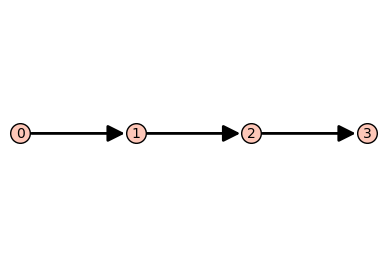

In [12]:
digraphs.Path(4).show()

In [13]:
# demo
transmissionProcessTC(digraphs.Path(4),0)

1[i0[], 2[i1[], 3[i2[], i3[]]]]

In [14]:
ts=[transmissionProcessTC(digraphs.Path(4),0)  for _ in range(1000)]
d=CountsDict(ts)
print len(d)
d

1


{1[i0[], 2[i1[], 3[i2[], i3[]]]]: 1000}

In [15]:
d=CountsDict([forgetAllLabels(t) for t in ts])
print len(d)
d

1


{[[], [[], [[], []]]]: 1000}

In [16]:
d=CountsDict([justTree(t) for t in ts])
len(d)
d

{Graph on 7 vertices: 1000}

<h1>
    SI Contact Network is the Star Network
</h1>
<p>
    Let the SICN be the star network.  We get the distribution of transmission trees at various resolutions next.
</p>

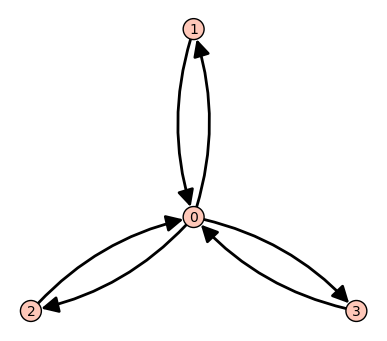

In [17]:
g=graphs.StarGraph(3).to_directed()
g.show()

In [18]:
# demo
transmissionProcessTC(graphs.StarGraph(3).to_directed(),0)

1[2[3[i0[], i1[]], i2[]], i3[]]

In [19]:
ts=[transmissionProcessTC(graphs.StarGraph(3).to_directed(),0)  for _ in range(10000)]
d=CountsDict(ts)
print len(d)
d

6


{1[2[3[i0[], i2[]], i3[]], i1[]]: 1669,
 1[2[3[i0[], i1[]], i3[]], i2[]]: 1691,
 1[2[3[i0[], i1[]], i2[]], i3[]]: 1693,
 1[2[3[i0[], i3[]], i1[]], i2[]]: 1681,
 1[2[3[i0[], i2[]], i1[]], i3[]]: 1590,
 1[2[3[i0[], i3[]], i2[]], i1[]]: 1676}

In [20]:
d=CountsDict([forgetLeafLabels(t) for t in ts])
print len(d)
d

1


{1[2[3[0[], 0[]], 0[]], 0[]]: 10000}

In [21]:
d=CountsDict([forgetAllLabels(t) for t in ts])
print len(d)
d

1


{[[[[], []], []], []]: 10000}

In [22]:
d=CountsDict([justTree(t) for t in ts])
len(d)
d

{Graph on 7 vertices: 10000}

# Likelihood Functions & Sufficient Statistics
## based on tree topology without labels or branch-lengths
Note one can include branch-lengths into the likelihood easily via the exponential rates for the continuous time Markov processes that the discrete jump chains studied here.
This will be necessary to conduct statistical inference for applied epidemiological models.

In [29]:
import numpy as np # import numpy for np.methods
# import optimize from scipy to do numerical optimization
from scipy import optimize

In [71]:
def splitsSequence(T):
    '''return a list of tuples (left,right) split sizes at each split node'''
    l = []
    LabelledBinaryTree(T).post_order_traversal(lambda node:
       l.append((node[0].node_number(),node[1].node_number())))
    return l

def prob_RPT(T,a,b):
    '''probability of ranked planar tree T under beta-splitting model
       a,b>-1, where (a+1,b+1) are the parameters of the beta distribution'''
    #print type(a),type(b)#type(x[0]),type(x[0])
    return prod(map(lambda x: beta(x[0]+RR(a+1),x[1]+RR(b+1))/beta(RR(a+1),RR(b+1)), 
                    splitsSequence(T)))

def negLogLkl_SplitPairCounts(spc,a,b):
    '''-log likelihood of multiple independent ranked planar trees
       through their sufficient statistics of the frequence of
       split-pair counts spc= [(nL_i,nR_i,c_i): i=1,..,K]
       under beta-splitting model
       a,b>-1, where (a+1,b+1) are the parameters of the beta
       distribution -- This implements first Equation in Thm 1 involving beta functions'''
    return -RR(sum(map(lambda x:
                x[2]*log(1.0*beta(x[0]+RR(a+1),x[1]+RR(b+1))/beta(RR(a+1),RR(b+1))), spc)))

def splitPairsCounts(TS):
    '''list of the frequency of all distinct split-pairs, i.e. (# of left splits, # right splits)
       beloe each internal node in each transmission tree in the list TS of transmission trees'''
    splitPairCounts=sorted(CountsDict(flatten([splitsSequence(t) for t in TS],max_level=1)).items())
    return [(x[0][0],x[0][1],x[1]) for x in splitPairCounts]

def splitPairsCountsDict(TS):
    '''dictionary of the frequency of all distinct split-pairs, i.e. (# of left splits, # right splits)
       beloe each internal node in each transmission tree in the list TS of transmission trees'''
    #splitPairCounts=sorted(CountsDict(flatten([splitsSequence(t) for t in TS],max_level=1)))
    sD = CountsDict(flatten([splitsSequence(t) for t in TS],max_level=1))
    return sD

def logLklOfASplitPair(a,b,nL,nR):
    '''beta(nL+a+1,nR+b+1)/beta(a+1,b+1) without beta functions via Eqn 2 in Thm 1'''
    A1=sum([log((b+j)/(b+j+a)) for j in range(nR+1)])
    A2=sum([log((a+i)/(a+i+b+nR+1)) for i in range(nL+1)])
    A3=log(b*a/((a+b)*(a+b+1)))
    return A1+A2-A3

def negLogLkl_SplitPairCounts2(spc,a,b):
    '''-log likelihood of multiple independent ranked planar trees
       through their sufficient statistics of the frequency of
       split-pair counts spc= [(nL_i,nR_i,c_i): i=1,..,K]
       under beta-splitting model
       a,b>-1, where (a+1,b+1) are the parameters of the beta
       distribution -- This implements second Equation in Thm 1 without beta functions'''
    return -(sum(map(lambda x:
                x[2]*logLklOfASplitPair(a,b,x[0],x[1]), spc)))

def LklOfASplitPair(a,b,nL,nR):
    '''beta(nL+a+1,nR+b+1)/beta(a+1,b+1) without beta functions via Eqn 2 in Thm 1'''
    A1=prod([((b+j)/(b+j+a)) for j in range(nR+1)])
    A2=prod([((a+i)/(a+i+b+nR+1)) for i in range(nL+1)])
    A3=(b*a/((a+b)*(a+b+1)))
    return (A1*A2)/A3

def negLogLkl_SplitPairCounts2Prod(spc,a,b):
    '''- log likelihood of multiple independent ranked planar trees
       through their sufficient statistics of the frequency of
       split-pair counts spc= [(nL_i,nR_i,c_i): i=1,..,K]
       under beta-splitting model
       a,b>-1, where (a+1,b+1) are the parameters of the beta
       distribution -- This implements second Equation in Thm 1 without beta functions'''
    return -(sum(map(lambda x:
                x[2]*log(LklOfASplitPair(a,b,x[0],x[1])), spc)))

## Demo of the mle for a complete graph with 50 nodes and 10 sampled trees

In [66]:
%time
# demo of the mle for a complete graph with 50 nodes and 10 sampled trees
c_1 = lambda p: p[0]+0.9999999 # constraint for alpha > -1
c_2 = lambda p: p[1]+0.9999999 # constraint for beta > -1
# simulation settings
n=50
reps=10
# trial 1: make a list of 10 independent transmission trees on complete graph with 50 nodes
ts1=[transmissionProcessTC(graphs.CompleteGraph(n).to_directed(),0)  for _ in range(reps)]
spc1=splitPairsCounts(ts1)
# trial 2: make another list of 10 independent transmission trees on complete graph with 50 nodes
ts2=[transmissionProcessTC(graphs.CompleteGraph(n).to_directed(),0)  for _ in range(reps)]
spc2=splitPairsCounts(ts2)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.01 µs


In [67]:
# slower more explicit method of finding MLE
# (don't use this for larger simuations!)
def negLkl1(AB): # negative log likelihood function for trees from trial 1
        return sum([-log(1.0*prob_RPT(ts1[j],AB[0],AB[1])) for j in range(reps)])
def negLkl2(AB): # negative log likelihood function for trees from trial 1
        return sum([-log(1.0*prob_RPT(ts2[j],AB[0],AB[1])) for j in range(reps)])


In [68]:
%time 
mle=minimize_constrained(negLkl1,[c_1,c_2],[0.0,0.0],disp=0) #MLE for trial 1
print [n,reps,mle]

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs
[50, 10, (0.010771921154612308, -0.019838413921828144)]


In [69]:
%time mle=minimize_constrained(negLkl2,[c_1,c_2],[0.0,0.0],disp=0) #MLE for trial 2
print [n,reps,mle]

CPU times: user 9.43 s, sys: 15.4 ms, total: 9.44 s
Wall time: 9.42 s
[50, 10, (-0.13003328887979357, -0.16882709146158115)]


In [72]:
# faster MLE computation using sufficient statistics of split-pair frequencies
# (don't use this for larger simuations!)
def negLkl1(AB):
        return negLogLkl_SplitPairCounts(spc1,AB[0],AB[1])

def negLkl2(AB):
        return negLogLkl_SplitPairCounts(spc2,AB[0],AB[1])

%time mle=minimize_constrained(negLkl1,[c_1,c_2],[0.0,0.0],disp=0) #MLE for trial 1
print [n,reps,mle]
%time mle=minimize_constrained(negLkl2,[c_1,c_2],[0.0,0.0],disp=0) #MLE for trial 2
print [n,reps,mle]

CPU times: user 1.65 s, sys: 29.2 ms, total: 1.68 s
Wall time: 1.6 s
[50, 10, (0.011234588301071997, -0.01983083247264783)]
CPU times: user 2.54 s, sys: 62.1 ms, total: 2.61 s
Wall time: 2.46 s
[50, 10, (-0.1300332955275645, -0.16882709568020923)]


In [73]:
# fastest and numerically most robust MLE computation using sufficient statistics
# USE this for larger simulations
def negLkl1(AB):
        return negLogLkl_SplitPairCounts2(spc1,AB[0],AB[1])

def negLkl2(AB):
        return negLogLkl_SplitPairCounts2(spc2,AB[0],AB[1])

%time mle=minimize_constrained(negLkl1,[c_1,c_2],[0.0,0.0],disp=0) #MLE for trial 1
print [n,reps,mle]
%time mle=minimize_constrained(negLkl2,[c_1,c_2],[0.0,0.0],disp=0) #MLE for trial 2
print [n,reps,mle]

/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:40: RuntimeWarning: invalid value encountered in double_scalars
/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/functions/log.py:436: RuntimeWarning: divide by zero encountered in log
  return ln(args[0], **kwds)
/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:42: RuntimeWarning: invalid value encountered in double_scalars
/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:43: RuntimeWarning: invalid value encountered in double_scalars
/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/functions/log.py:436: RuntimeWarning: invalid value encountered in log
  return ln(args[0], **kwds)


CPU times: user 2.94 s, sys: 106 ms, total: 3.04 s
Wall time: 2.93 s
[50, 10, (0.031970627805884215, 5.996510079955868e-06)]
CPU times: user 2.43 s, sys: 65.4 ms, total: 2.5 s
Wall time: 2.4 s
[50, 10, (0.03675461291727236, 5.9478761198071686e-05)]


## Sufficient Statistics of the parameters specifying the distribution for Beta-splitting Transmission Tree topologies

In [74]:
len(ts1),len(ts2) # number of trees in each trial

(10, 10)

In [75]:
def denMatOfsplitPairsCounts(ts,n,EMF):
    '''dense matrix of split pair counts of transmission trees in the list ts
       normalise to sum to 1 if EMF = Empirical Mass Function = True '''
    spcD=splitPairsCountsDict(ts); spcD[(0,n)]=0; spcD[(n,0)]=0;
    ss=matrix(spcD).dense_matrix()
    if EMF:
        ss=ss/sum(sum(ss))
    return ss

Let's save these plots

In [ ]:
mp1=matrix_plot(np.log1p(denMatOfsplitPairsCounts(ts1,n,0)) , cmap='summer', colorbar=True)
mp2=matrix_plot(np.log1p(denMatOfsplitPairsCounts(ts2,n,0)) , cmap='summer', colorbar=True)

In [ ]:
mp2.show()

In [ ]:
%sh
pwd

In [ ]:
%sh
#mkdir /projects/58dfa924-55ae-4b6c-9fd4-1cd0ef49eb7c/figures && ls
ls

In [0]:
mp1.save('./figures/SuffStatsCompleteGraph_n50_reps10_mp1.png')
mp1.save('./figures/SuffStatsCompleteGraph_n50_reps10_mp1.eps')
mp1.save('./figures/SuffStatsCompleteGraph_n50_reps10_mp1.pdf')
mp2.save('./figures/SuffStatsCompleteGraph_n50_reps10_mp2.png')
mp2.save('./figures/SuffStatsCompleteGraph_n50_reps10_mp2.eps')
mp2.save('./figures/SuffStatsCompleteGraph_n50_reps10_mp2.pdf')

Let's do a more exhaustive simulation next

In [76]:
%time
# demo of the mle for a complete graph with 50 nodes and 10 sampled trees
c_1 = lambda p: p[0]+0.9999999 # constraint for alpha > -1
c_2 = lambda p: p[1]+0.9999999 # constraint for beta > -1
# simulation settings
n=50
reps=1000
# trial 1: make a list of 10 independent transmission trees on complete graph with 50 nodes
ts3=[transmissionProcessTC(graphs.CompleteGraph(n).to_directed(),0)  for _ in range(reps)]
spc3=splitPairsCounts(ts3)

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 7.87 µs


In [77]:
spc3=splitPairsCounts(ts3)

In [78]:
def negLkl3(AB):
        return negLogLkl_SplitPairCounts2(spc3,AB[0],AB[1])
%time mle=minimize_constrained(negLkl3,[c_1,c_2],[0.0,0.0],disp=0) #MLE for trial 1
print [n,reps,mle]

/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:40: RuntimeWarning: invalid value encountered in double_scalars
/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:42: RuntimeWarning: invalid value encountered in double_scalars


CPU times: user 36.2 s, sys: 156 ms, total: 36.3 s
Wall time: 36 s
[50, 1000, (0.008257644595097629, -5.225275446678913e-05)]


/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:43: RuntimeWarning: invalid value encountered in double_scalars


In [0]:
#mp3=matrix_plot(np.log1p(denMatOfsplitPairsCounts(ts3,n,1)*np.double(1000)), norm='value', cmap='summer') # a log(1+prob*1000) plot of the
mp3=matrix_plot(np.log1p(denMatOfsplitPairsCounts(ts3,n,0)*np.double(1)) , cmap='summer', colorbar=True)#, norm='value', cmap='summer', colorbar=True) # a log(1+freq) plot of the

In [0]:
mp3.show()

In [0]:
mp3.save('./figures/SuffStatsCompleteGraph_n50_reps1000_mp3.png')
mp3.save('./figures/SuffStatsCompleteGraph_n50_reps1000_mp3.eps')
mp3.save('./figures/SuffStatsCompleteGraph_n50_reps1000_mp3.pdf')

In [0]:
%sh
ls figures/

# Some Deterministic Contact Networks

## Bidirectional Circular Network

In [79]:
g=digraphs.Circulant(5,[1,-1])
g.show()

To Make Latex tikz-graph see [http://doc.sagemath.org/html/en/reference/graphs/sage/graphs/graph_latex.html](http://doc.sagemath.org/html/en/reference/graphs/sage/graphs/graph_latex.html).

In [80]:
H = digraphs.Circulant(6,[1,-1])
H.set_latex_options(
   graphic_size=(5,5),
   vertex_size=0.2,
   edge_thickness=0.04,
   edge_color='green',
   vertex_color='green',
   vertex_label_color='red',
   format='tkz_graph',
   #tkz_style='Art',
   #layout='acyclic'
   )
latex(H)

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.502,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{1.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.502,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{1.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.502,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{1.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.502,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{1.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.502,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{1.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.502,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{1.0,0.0,0.0}
\definecolor{cv0v1}{rgb}{0.0,0.502,0.0}
\definecolor{cv0v5}{rgb}{0.0,0.502,0.0}
\definecolor{cv1v0}{rgb}{0.0,0.502,0.0}
\definecolor{cv1v2}{rgb}{0.0,0.502,0.0}
\definecolor{cv2v1}{rgb}{0.0,0.502,0.0}
\definecolor{cv2v3}{rgb}{0.0,0.502,0.0}
\definecolor{cv3v2}{rgb}{0.0,0.502,0.0}
\definecolor{cv3v4}{rgb}{0.0

In [81]:
ts=[transmissionProcessTC(digraphs.Circulant(6,[1,-1]),0)  for _ in range(10)]

In [82]:
T = ts[3]
view(T)

In [0]:
#latex(T)

Just checking that the trees are uniformly distributed over 2^{n-1} ORBOR trees := Only-Right-Branching-subtrees-Of-Root-node trees (for peace of mind :).

In [83]:
ts=[transmissionProcessTC(digraphs.Circulant(3,[1,-1]),0)  for _ in range(10000)]
d=CountsDict(ts)
print len(d)
d

4


{1[i0[], 2[i2[], i1[]]]: 2492,
 1[i0[], 2[i1[], i2[]]]: 2506,
 1[2[i0[], i1[]], i2[]]: 2490,
 1[2[i0[], i2[]], i1[]]: 2512}

In [84]:
ts=[transmissionProcessTC(digraphs.Circulant(4,[1,-1]),0)  for _ in range(10000)]
d=CountsDict(ts)
print len(d)
d

8


{1[i0[], 2[i1[], 3[i2[], i3[]]]]: 1234,
 1[i0[], 2[i3[], 3[i2[], i1[]]]]: 1247,
 1[2[i0[], i3[]], 3[i1[], i2[]]]: 1258,
 1[3[i0[], i3[]], 2[i1[], i2[]]]: 1223,
 1[2[i0[], i1[]], 3[i3[], i2[]]]: 1274,
 1[3[i0[], i1[]], 2[i3[], i2[]]]: 1242,
 1[2[i0[], 3[i1[], i2[]]], i3[]]: 1272,
 1[2[i0[], 3[i3[], i2[]]], i1[]]: 1250}

In [87]:
for t in d.keys():
    print ascii_art(t)

  __1___
 /     /      
i0   _2___
    /    /   
   i1   3__
       /  / 
      i2 i3
     ___1____
    /       / 
  _2___    i3
 /    /   
i0   3__  
    /  /  
   i1 i2  
     ___1____
    /       / 
  _2___    i1
 /    /   
i0   3__  
    /  /  
   i3 i2  
    __1____
   /      /   
  2__    3__
 /  /   /  / 
i0 i3  i1 i2
    __1____
   /      /   
  3__    2__
 /  /   /  / 
i0 i3  i1 i2
  __1___
 /     /      
i0   _2___
    /    /   
   i3   3__
       /  / 
      i2 i1
    __1____
   /      /   
  2__    3__
 /  /   /  / 
i0 i1  i3 i2
    __1____
   /      /   
  3__    2__
 /  /   /  / 
i0 i1  i3 i2


MLE of transmission trees from the bidirectional circular network.

In [88]:
%time
# demo of the mle for a BalancedTree(2,k) graph with k=4,5,6 or n=31,63,127 nodes and 1 or 10 sampled trees
c_1 = lambda p: p[0]+0.9999999 # constraint for alpha > -1
c_2 = lambda p: p[1]+0.9999999 # constraint for beta > -1
mles=[]
n=50
reps=1 # all reps have the same unlabelled transmission tree topology
trials=5
for i in range(trials):
    ts=[transmissionProcessTC(digraphs.Circulant(n,[1,-1]),0)  for _ in range(reps)]
    spc=splitPairsCounts(ts)
    def negLkl(AB):
        return negLogLkl_SplitPairCounts2(spc,AB[0],AB[1])
    mle=minimize_constrained(negLkl,[c_1,c_2],[0.0,0.0],disp=0)
    x = [n,reps, i, mle, negLkl(mle)]
    print x
    mles.append(x)
#mles

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:40: RuntimeWarning: invalid value encountered in double_scalars
/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:42: RuntimeWarning: invalid value encountered in double_scalars
/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:43: RuntimeWarning: invalid value encountered in double_scalars


[50, 1, 0, (-8.792595840485248e-06, 1.1831329670056965), 114.90280742881335]
[50, 1, 1, (3.165390135658405e-05, 1.1959116177646902), 114.21793400042117]
[50, 1, 2, (3.020658438127998e-05, 1.1968735214473907), 114.30579964301647]
[50, 1, 3, (-9.179569556689722e-05, 1.1928208959454019), 114.5879684893313]
[50, 1, 4, (9.840661348644198e-06, 1.1968040683188568), 114.3541442732135]


In [89]:
print (n, reps, trials, mean([x[3][0] for x in mles]), std([x[3][0] for x in mles]), mean([x[3][1] for x in mles]), std([x[3][1] for x in mles]))

(50, 1, 5, -5.777428864174849e-06, 5.086283483958604e-05, 1.1931086140964071, 0.005815583707783363)


In [0]:
# (50, 1, 5, -0.9880406098481203, 0.0006220653042760461, 1.4583751679644803, 0.15345032109817106)
# (50, 100, 5, -0.9878920259080713, 3.460969702959854e-05, 1.5188788157835482, 0.006721406185256709)

Let us repeat the same computation over the relative frequency of split-pairs as opposed to the frequency over a larger number of replicate transmission trees.

In [90]:
%time
# demo of the mle for a BalancedTree(2,k) graph with k=4,5,6 or n=31,63,127 nodes and 1 or 10 sampled trees
c_1 = lambda p: p[0]+0.9999999 # constraint for alpha > -1
c_2 = lambda p: p[1]+0.9999999 # constraint for beta > -1
mles=[]
n=50
reps=100 # all reps have the same unlabelled transmission tree topology
trials=5
for ti in range(trials):
    ts=[transmissionProcessTC(digraphs.Circulant(n,[1,-1]),0)  for _ in range(reps)]
    spc=splitPairsCounts(ts)
    s=sum([x[2] for x in spc])
    spcRf=[]
    for i in range(len(spc)):
        spcRf.append((spc[i][0],spc[i][1],spc[i][2]/s))
    def negLkl(AB):
        return negLogLkl_SplitPairCounts2(spcRf,AB[0],AB[1])
    mle=minimize_constrained(negLkl,[c_1,c_2],[0.0,0.0],disp=0)
    x = [n,reps, i, mle, negLkl(mle)]
    print x
    mles.append(x)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:40: RuntimeWarning: invalid value encountered in double_scalars
/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:42: RuntimeWarning: invalid value encountered in double_scalars
/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:43: RuntimeWarning: invalid value encountered in double_scalars


[50, 100, 48, (1.647540513446033e-06, 1.194741099390695), 2.33430876618039]
[50, 100, 50, (7.82417545377368e-05, 1.1944391676148494), 2.334575179948109]
[50, 100, 51, (8.091526118396235e-05, 1.1944950836618953), 2.334648242632401]
[50, 100, 49, (9.18105757219942e-05, 1.1946552029670947), 2.3346530745629615]
[50, 100, 49, (7.743419397365802e-05, 1.1944020293185944), 2.334462880336323]


In [91]:
print (n, reps, trials, mean([x[3][0] for x in mles]), std([x[3][0] for x in mles]), mean([x[3][1] for x in mles]), std([x[3][1] for x in mles]))

(50, 100, 5, 6.600986518615949e-05, 3.6436556974538385e-05, 1.1945465165906257, 0.00014553428724003436)


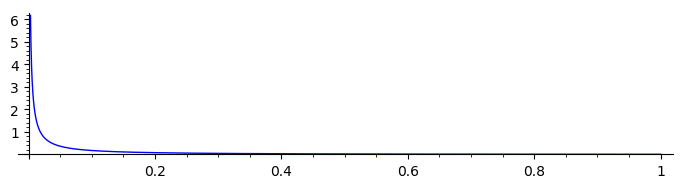

In [92]:
a=-0.98; b=1.5; BetaD = RealDistribution('beta', [a+1, b+1],seed=0)
show(BetaD.plot(xmin=0,xmax=1),figsize=[7,2]);

In [94]:
print ascii_art(ts[4]) # labelled transmission tree

       _________________________________________________________________________1__________________________________________________________________________
      /                                                                                                                                                   /                                                                                   
  ___2____                                                                                                                                            ___4____
 /       /                                                                                                                                           /       /                                                                               
i0   ___3_____                                                                                                                                      i1   ___8____
    /        /                                

## Balanced Tree Network

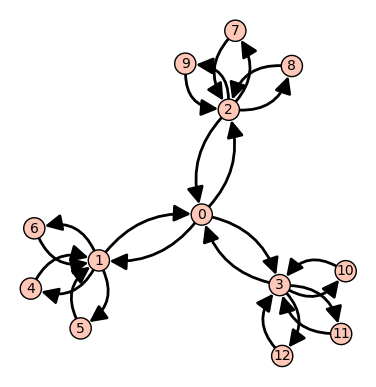

In [95]:
g=graphs.BalancedTree(3,2).to_directed()
g.show()

To Make Latex tikz-graph see [http://doc.sagemath.org/html/en/reference/graphs/sage/graphs/graph_latex.html](http://doc.sagemath.org/html/en/reference/graphs/sage/graphs/graph_latex.html).

In [96]:
H = graphs.BalancedTree(2,3).to_directed()
#H = graphs.BalancedTree(3,2).to_directed()
H.set_latex_options(
   graphic_size=(5,5),
   vertex_size=0.2,
   edge_thickness=0.04,
   edge_color='green',
   vertex_color='green',
   vertex_label_color='red',
   format='tkz_graph',
   #tkz_style='Art',
   layout='acyclic'
   )

In [97]:
#view(H)
#latex(H)

In [98]:
#latex(H)

In [99]:
d,h=3,2
g=graphs.BalancedTree(d,h).to_directed()
g.show()

In [100]:
d,h=3,3
ts=[transmissionProcessTC(graphs.BalancedTree(d,h).to_directed(),0)  for _ in range(10000)]
#myDict=CountsDict(ts)
#myDict=CountsDict([forgetLeafLabels(t) for t in ts])
myDict=CountsDict([forgetAllLabels(t) for t in ts])
print len(myDict)
#myDict

1


In [101]:
for t in myDict.keys(): # d,h=3,3 "left-branching 3-shark" tree
    print ascii_art(t)

                                          _______________________________o________________________________
                                         /                                                               /            
                ________________________o__________________________                             ________o__________
               /                                                  /                            /                  /  
  ____________o_____________                             ________o__________           _______o________         _o__
 /                         /                            /                  /          /               /        /   /
o                 ________o__________           _______o________         _o__     ___o_____         _o__      o__ o
                 /                  /          /               /        /   /    /        /        /   /     /  /
         _______o________         _o__     ___o_____         _o__      o__ o

In [102]:
# so long so far... could pursue the rank placements on balanced trees

In [103]:
graphs.BalancedTree(2,6).to_directed().order()

127

In [104]:
%time
# demo of the mle for a BalancedTree(2,k) graph with k=4,5,6 or n=31,63,127 nodes and 1 or 10 sampled trees
c_1 = lambda p: p[0]+0.9999999 # constraint for alpha > -1
c_2 = lambda p: p[1]+0.9999999 # constraint for beta > -1
mles=[]
d,h=2,6
n=graphs.BalancedTree(d,h).to_directed().order()
reps=1 # all reps have the same unlabelled transmission tree topology
trials=2
for i in range(trials):
    ts=[transmissionProcessTC(graphs.BalancedTree(d,h).to_directed(),0)  for _ in range(reps)]
    spc=splitPairsCounts(ts)
    def negLkl(AB):
        return negLogLkl_SplitPairCounts2(spc,AB[0],AB[1])
    mle=minimize_constrained(negLkl,[c_1,c_2],[0.0,0.0],disp=0)
    x = [d,h, n,reps, i, mle]
    print x
    mles.append(x)
#mles

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs
[2, 6, 127, 1, 0, (1.3289738468841965e-05, 0.503658014888055)]
[2, 6, 127, 1, 1, (1.3289738468841965e-05, 0.503658014888055)]


/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:40: RuntimeWarning: invalid value encountered in double_scalars
/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:42: RuntimeWarning: invalid value encountered in double_scalars
/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:43: RuntimeWarning: invalid value encountered in double_scalars


In [105]:
#[2, 6, 127, 1, 0, (-0.3259079515975824, -0.05752026912960705)]
#[2, 7, 255, 1, 0, (-0.3694074748854663, -0.10600727506430978)]
#[2, 8, 511, 1, 0, (-0.39276938517987087, -0.1329531458925401)]
#[2, 9, 1023, 1, 0, (-0.4051981012968259, -0.14770363723074506)]
#[2, 10, 2047, 1, 0, (-0.41245772002324016, -0.15622461056846243)]

In [106]:
#ts=[transmissionProcessTC(graphs.BalancedTree(2,3).to_directed(),0)  for _ in range(5)]
ts=[transmissionProcessTC(graphs.BalancedTree(3,2).to_directed(),0)  for _ in range(5)]
ascii_art(ts[0]) # labelled transmission tree is always the "left-branching 3-shark" ignoring labels

                     _____________1______________
                    /                           /    
         __________5___________              __2___
        /                     /             /     / 
  _____7______             __6____        _3___  i9
 /           /            /      /       /    / 
i0        __8___       __10__   i10     4__  i8 
         /     /      /     /          /  /     
       _9___  i5     12_   i12        i2 i7     
      /    /        /  /             
     11_  i6       i3 i11            
    /  /                             
   i1 i4                             

In [107]:
T = ts[4]
#view(T)
#latex(T)

## Toroidal Grid Network

In [108]:
def toroidal2DGrid(n):
    G = graphs.GridGraph([n,n])
    #G.show()  # long time
    G.add_edges([((i,0),(i,n-1)) for i in range(n)])
    G.add_edges([((0,i),(n-1,i)) for i in range(n)])
    G.relabel()
    return G

In [109]:
ts=[transmissionProcessTC(toroidal2DGrid(10).to_directed(),0)  for _ in range(10)]
# gives several distinct unlabelled trees depending on the sequence of infection events
d=CountsDict([forgetAllLabels(t) for t in ts])
len(d)
d.values()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [110]:
d=CountsDict([justTree(t) for t in ts])
# gives several distinct trees depending on the sequence of infection events
len(d)
d.values()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [111]:
%time
# demo of the mle - way too long...
c_1 = lambda p: p[0]+0.9999999 # constraint for alpha > -1
c_2 = lambda p: p[1]+0.9999999 # constraint for beta > -1
# simulation settings
m=10
n=m^2
reps=10
repeatMLE=5
for i in range(repeatMLE):
    ts=[transmissionProcessTC(toroidal2DGrid(m).to_directed(),0)  for _ in range(reps)]
    spc=splitPairsCounts(ts)
    def negLkl(AB):
        return negLogLkl_SplitPairCounts2(spc,AB[0],AB[1])
    mle=minimize_constrained(negLkl,[c_1,c_2],[0.0,0.0],disp=0)
    print [i, n,reps,mle]

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs


/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:40: RuntimeWarning: invalid value encountered in double_scalars
/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:42: RuntimeWarning: invalid value encountered in double_scalars
/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:43: RuntimeWarning: invalid value encountered in double_scalars


[0, 100, 10, (-6.35573517796592e-05, 1.382600137471022)]
[1, 100, 10, (4.8610145455904744e-05, 1.3374352844101918)]
[2, 100, 10, (-3.6245842945534164e-05, 1.4400442983639659)]
[3, 100, 10, (2.7373987930387332e-05, 1.3845394657668335)]
[4, 100, 10, (-9.574383290547051e-05, 1.4191616442733646)]


Let us see graph in latex.

In [112]:
H = toroidal2DGrid(3).to_directed()
H.set_latex_options(
   graphic_size=(5,5),
   vertex_size=0.2,
   edge_thickness=0.04,
   edge_color='green',
   vertex_color='green',
   vertex_label_color='red',
   format='tkz_graph',
   #tkz_style='Art',
   #layout='acyclic'
   )

In [113]:
#view(H)
#latex(H)

In [114]:
ts=[transmissionProcessTC(toroidal2DGrid(3).to_directed(),0)  for _ in range(10)]

In [115]:
#view(ts[0])

In [116]:
#latex(ts[0])

In [117]:
#view(ts[1])

In [118]:
#latex(ts[1])

In [119]:
#view(ts[3])
#latex(T)

In [120]:
#latex(ts[3])

3D Toroidal Grid

In [121]:
def toroidal3DGrid(n):
    G = graphs.GridGraph([n,n,n])
    #G.show()  # long time
    G.add_edges([((0,i,j),(n-1,i,j)) for i in range(n) for j in range(n)])
    G.add_edges([((i,0,j),(i,n-1,j)) for i in range(n) for j in range(n)])
    G.add_edges([((i,j,0),(i,j,n-1)) for i in range(n) for j in range(n)])
    G.relabel()
    return G

In [122]:
%time
# demo of the mle
c_1 = lambda p: p[0]+0.9999999 # constraint for alpha > -1
c_2 = lambda p: p[1]+0.9999999 # constraint for beta > -1
m=10
n=m^3
reps=1 # all reps have the same unlabelled transmission tree topology
for i in range(5):
    ts=[transmissionProcessTC(toroidal3DGrid(m).to_directed(),0)  for _ in range(reps)]
    spc=splitPairsCounts(ts)
    def negLkl(AB):
        return negLogLkl_SplitPairCounts2(spc,AB[0],AB[1])
    mle=minimize_constrained(negLkl,[c_1,c_2],[0.0,0.0],disp=0)
    print [n,reps, i, mle]

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:40: RuntimeWarning: invalid value encountered in double_scalars
/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:42: RuntimeWarning: invalid value encountered in double_scalars
/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:43: RuntimeWarning: invalid value encountered in double_scalars


[1000, 1, 0, (-1.5841576102349825e-05, 1.2718359737143285)]
[1000, 1, 1, (0.00010231372481093213, 1.2938391155193338)]
[1000, 1, 2, (-4.7020326754024534e-05, 1.265934402129994)]
[1000, 1, 3, (-6.41612035856345e-05, 1.2984605759147545)]
[1000, 1, 4, (2.4231736702850842e-05, 1.2109588390409605)]


# Some Random Contact Networks

## Erdos-Renyi

In [123]:
def ErdosReyniConnectedCompOf0(n,p,reps):
    '''return reps many transmission trees from the connected component containing initial infection vertex 0'''
    ts=[]
    i=0; MAXTrials=10000; successfulTrials=0;
    while (successfulTrials<reps or i>MAXTrials):
        i=i+1
        g0=graphs.RandomGNP(n,p).to_directed()
        g=g0.subgraph(g0.connected_component_containing_vertex(0))
        if g.order()>1: # just making sure we have at least 2 nodes in the connected component containing 0
            #print g.order(), g.size()
            ts.append(transmissionProcessTC(g,0))
            successfulTrials=successfulTrials+1
    return ts

In [124]:
%time
# demo of the mle
mleList=[]
c_1 = lambda p: p[0]+0.9999999 # constraint for alpha > -1
c_2 = lambda p: p[1]+0.9999999 # constraint for beta > -1
n=100
#Lambdas=[floor(RR(n/2^i)) for i in range(ceil(log(n,2)))]; Lambdas.reverse(); #Lambdas
Lambdas=sorted(Set([floor(RR(n/(5/4)^i)) for i in range(ceil(log(n,5/4)))]));
for L in Lambdas:
    prob=RR(L/n) # edge prob in Erdos-Reyni random graph on n nodes = lambda/n where lambda = expected degree of a node
    reps=30 # all reps have the same unlabelled transmission tree topology
    for i in range(5):
        ts= ErdosReyniConnectedCompOf0(n,prob,reps)
        spc=splitPairsCounts(ts)
        def negLkl(AB):
            return negLogLkl_SplitPairCounts2(spc,AB[0],AB[1])
        mle=minimize_constrained(negLkl,[c_1,c_2],[0.0,0.0],disp=0)
        # mean number of connected components = pop size = # leaves in transmission tree
        meanNumCc=RR(mean([(t.node_number()+1)/2 for t in ts]))
        mleL=[n, prob, L, reps, meanNumCc, mle]
        print mleL
        mleList.append(mleL)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs


/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:40: RuntimeWarning: invalid value encountered in double_scalars
/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:42: RuntimeWarning: invalid value encountered in double_scalars
/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:43: RuntimeWarning: invalid value encountered in double_scalars


[100, 0.0100000000000000, 1, 30, 14.9000000000000, (2.3854875058449494e-06, 1.194932199642359)]
[100, 0.0100000000000000, 1, 30, 10.9666666666667, (-8.21304925493656e-05, 1.2665125630169516)]
[100, 0.0100000000000000, 1, 30, 9.50000000000000, (-4.310579913084337e-05, 1.1058600466412978)]
[100, 0.0100000000000000, 1, 30, 12.4000000000000, (-1.6801352686140103e-05, 1.1843019242664594)]
[100, 0.0100000000000000, 1, 30, 11.9333333333333, (3.912123786740159e-05, 1.1952756012245773)]
[100, 0.0200000000000000, 2, 30, 72.3000000000000, (-5.145673194219307e-05, 1.11384052150297)]
[100, 0.0200000000000000, 2, 30, 75.3333333333333, (6.896258203130317e-05, 1.1196105143522639)]
[100, 0.0200000000000000, 2, 30, 71.8666666666667, (-2.1893169555355665e-05, 1.1390209033221432)]
[100, 0.0200000000000000, 2, 30, 75.0666666666667, (7.278843302288867e-05, 1.2082437037987013)]
[100, 0.0200000000000000, 2, 30, 78.4000000000000, (-2.1177462955445007e-05, 1.232767157882808)]
[100, 0.0300000000000000, 3, 30, 93

[100, 1.00000000000000, 100, 30, 100.000000000000, (-6.496671780785821e-05, 0.027300679201327345)]
[100, 1.00000000000000, 100, 30, 100.000000000000, (-9.570705798927691e-05, -0.042053779066805276)]
[100, 1.00000000000000, 100, 30, 100.000000000000, (0.02473881042138093, 0.026322365953866465)]
[100, 1.00000000000000, 100, 30, 100.000000000000, (0.004654379569318252, 0.00219591262721843)]
[100, 1.00000000000000, 100, 30, 100.000000000000, (-4.645819701937634e-05, -0.009957182440910421)]


In [125]:
n=100.; print log(n)/n # edge probability threshold for getting a connected component

0.0460517018598809


In [126]:
n=100; print log(100.) # average node degree threshold for getting a connected component

4.60517018598809


In [128]:
%time
# demo of the mle - way too long...
c_1 = lambda p: p[0]+0.9999999 # constraint for alpha > -1
c_2 = lambda p: p[1]+0.9999999 # constraint for beta > -1
# simulation settings
mles=[]
n,prob,reps,repeatMLE=100,0.05,10,5 #50,5/49.,100,5
for i in range(repeatMLE):
    ts=ErdosReyniConnectedCompOf0(n,prob,reps)
    spc=splitPairsCounts(ts)
    def negLkl(AB):
        #return negLogLkl_SplitPairCounts2(spc,AB[0],AB[1]) # our standard method - not ok for p>0.0
        return negLogLkl_SplitPairCounts2Prod(spc,AB[0],AB[1]) # good rechecker
    mle=minimize_constrained(negLkl,[c_1,c_2],[.0,.0],disp=0)
    meanNumCc=RR(mean([(t.node_number()+1)/2 for t in ts]))
    x = [i, n, prob, reps, mle, negLkl(mle), meanNumCc]
    print x
    mles.append(x)
y=mean([x[4][0] for x in mles]),std([x[4][0] for x in mles]), mean([x[4][1] for x in mles]),std([x[4][1] for x in mles]); [x.n(digits=4) for x in y]

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:57: RuntimeWarning: invalid value encountered in double_scalars
/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:59: RuntimeWarning: invalid value encountered in double_scalars
/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:60: RuntimeWarning: invalid value encountered in double_scalars


[0, 100, 0.0500000000000000, 10, (-0.37194441014909324, -0.20307468847673504), 3528.147579052383, 99.0000000000000]
[1, 100, 0.0500000000000000, 10, (-0.4329433846798323, -0.2910488269085568), 3548.5612527705534, 99.6000000000000]
[2, 100, 0.0500000000000000, 10, (-0.3942386452258106, -0.19948577080492363), 3542.463641182792, 99.4000000000000]
[3, 100, 0.0500000000000000, 10, (-0.4608533288084901, -0.26362403464914946), 3518.2231727639105, 99.1000000000000]
[4, 100, 0.0500000000000000, 10, (-0.4142507902691425, -0.2424307728432661), 3543.8699534974726, 99.5000000000000]


[-0.4148, 0.03431, -0.2399, 0.03929]

In [0]:
# n,prob,reps,repeatMLE=50,0.04,30,5
#[0, 50, 2, 1.00000000000000, 30, (-0.7667591970714925, -0.5672234464838595), 2773.4718576096257, 37.5000000000000]
#[1, 50, 2, 1.00000000000000, 30, (-0.7214867804712249, -0.5415563735009684), 2571.6445754280776, 34.4000000000000]
#[2, 50, 2, 1.00000000000000, 30, (-0.7393765497380875, -0.525764191886687), 2701.583541657241, 36.4000000000000]
#[3, 50, 2, 1.00000000000000, 30, (-0.7482689119705859, -0.5327256368435153), 2883.349138665519, 38.3333333333333]
#[4, 50, 2, 1.00000000000000, 30, (-0.7660644698091582, -0.5746573248509714), 2740.2940119367827, 36.8333333333333]
#[-0.7484, 0.01907, -0.5484, 0.02150]
# n,prob,reps,repeatMLE=50,0.06,30,5
#[0, 50, 2, 1.00000000000000, 30, (-0.5951261508841413, -0.38549653008638246), 3783.127909979816, 45.6666666666667]
#[1, 50, 2, 1.00000000000000, 30, (-0.6303056569753376, -0.43061971591340364), 3900.4206600762795, 47.2000000000000]
#[2, 50, 2, 1.00000000000000, 30, (-0.6098958904200529, -0.396836976185501), 3909.283696080642, 47.1666666666667]
#[3, 50, 2, 1.00000000000000, 30, (-0.5563622923900977, -0.3258917498969631), 3967.752465957892, 47.5000000000000]
#[4, 50, 2, 1.00000000000000, 30, (-0.6139741520197212, -0.4041535631904723), 3891.4915292888013, 47.0333333333333]
#[-0.6011, 0.02799, -0.3886, 0.03879]

# n,prob,reps,repeatMLE=50,3/49.,30,5
[0, 50, 3, 1.00000000000000, 30, (-0.5983777634278724, -0.4291393006309947), 3976.460464836187, 47.6666666666667]
[1, 50, 3, 1.00000000000000, 30, (-0.5707923610262577, -0.3961141455439096), 4005.615823705353, 47.8333333333333]
[2, 50, 3, 1.00000000000000, 30, (-0.6183197359092514, -0.4261981038048322), 3949.032714636033, 47.5666666666667]
[3, 50, 3, 1.00000000000000, 30, (-0.6048013904814242, -0.37676154716542365), 3773.912360800056, 45.6333333333333]
[4, 50, 3, 1.00000000000000, 30, (-0.5593275350868996, -0.290756860450979), 3891.852472272532, 46.9000000000000]
[-0.5903, 0.02450, -0.3838, 0.05637] # [-0.8544, 0.009650, -0.6907, 0.01825] # compare from SmallWorld(n=50,k=3,p=1)

# n,prob,reps,repeatMLE=100,5/99.,30,5 - compare with SmallWorld(n=100,k=5,p=1) [-0.5079, 0.02486, -0.2263, 0.03785]
# [-0.4106, 0.02340, -0.2228, 0.03605]
# n,prob,reps,repeatMLE=50,5/49.,30,5 - compare with SmallWorld(n=50,k=5,p=1) [-0.4674, 0.01723, -0.1759, 0.02064]
[-0.3682, 0.04354, -0.1984, 0.03857]
# n,prob,reps,repeatMLE=50,5/49.=0.102040816326531,100,5
[-0.3798, 0.01348, -0.2068, 0.01602]

## Random Regular Network

In [129]:
d,n=3,10 # n>d>2, and n*d is even
H = graphs.RandomRegular(d,n).to_directed()
H.set_latex_options(
   graphic_size=(5,5),
   vertex_size=0.2,
   edge_thickness=0.04,
   edge_color='green',
   vertex_color='green',
   vertex_label_color='red',
   format='tkz_graph',
   tkz_style='Art',
   #layout='acyclic'
   )
view(H)

In [0]:
#graphs.RandomRegular?

In [130]:
%time
# demo of the mle - way too long...
c_1 = lambda p: p[0]+0.9999999 # constraint for alpha > -1
c_2 = lambda p: p[1]+0.9999999 # constraint for beta > -1
# simulation settings
mles=[]
d,n=4,1000 # n>d>2, and n*d is even
reps=1
repeatMLE=5
for i in range(repeatMLE):
    ts=[transmissionProcessTC(graphs.RandomRegular(d,n).to_directed(),0)  for _ in range(reps)]
    spc=splitPairsCounts(ts)
    def negLkl(AB):
        return negLogLkl_SplitPairCounts2(spc,AB[0],AB[1])
    mle=minimize_constrained(negLkl,[c_1,c_2],[0.0,0.0],disp=0)
    x = [i, n,reps, mle]
    print x
    mles.append(x)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs


/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:40: RuntimeWarning: invalid value encountered in double_scalars
/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:42: RuntimeWarning: invalid value encountered in double_scalars
/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:43: RuntimeWarning: invalid value encountered in double_scalars


[0, 1000, 1, (-6.699003410771384e-05, 1.492880005965357)]
[1, 1000, 1, (-5.614267885718151e-05, 1.4976610580327168)]
[2, 1000, 1, (1.6012038675256345e-05, 1.4336854290033194)]
[3, 1000, 1, (-4.460820868903672e-05, 1.4218018549126339)]
[4, 1000, 1, (7.940143999166175e-05, 1.3161517178186364)]


In [0]:
#mles

In [131]:
#mles=[[0, 1000, 1, (-0.5694710622607956, 0.07235568882556642)], [1, 1000, 1, (-0.5813499039580335, -0.0008921069166473263)], [2, 1000, 1, (-0.5125503757396102, 0.12009937792771662)], [3, 1000, 1, (-0.5972839322945308, 0.005026801639200447)], [4, 1000, 1, (-0.516945909495096, 0.17203343447026423)]]
y=mean([x[3][0] for x in mles]),std([x[3][0] for x in mles]), mean([x[3][1] for x in mles]),std([x[3][1] for x in mles]); [x.n(digits=4) for x in y]

[-0.00001447, 0.00006153, 1.432, 0.07339]

In [0]:
#

## Small World Random Network

In [132]:
g=graphs.RandomNewmanWattsStrogatz(7, 2, 0.5) # no rewiring is done :(
g.show()

In [133]:
import networkx # so we use the networkx implementation
g = DiGraph(networkx.watts_strogatz_graph(7,2,0.2))
g.show()

In [134]:
networkx.watts_strogatz_graph?

In [137]:
#%%sh
#cat /projects/sage/sage-6.10/local/lib/python2.7/site-packages/networkx-1.10-py2.7.egg/networkx/generators/random_graphs.py #, the man dawg!

In [138]:
g.is_connected()

True

In [139]:
g.set_pos(g.layout_circular())
view(g)

In [140]:
def findMaxDegAndItsVertex(gr):
    '''find the maximum degree in a graph and its vertex with smalelst ID'''
    maxD=0; maxDv=0;
    for vd in gr.degree_iterator(range(n),True):
        #print vd
        if vd[1] > maxD:
            maxD=vd[1]; maxDv=vd[0];
    return maxD,maxDv

import networkx # so we use the networkx implementation

def ConnectedSmallWorldFromMostpopular(n,k,p,reps):
    '''return reps many transmission trees from the connected small-world network
       initialized from the most popular smallest node'''
    ts=[]
    i=0; MAXTrials=10000; successfulTrials=0;
    while (successfulTrials<reps or i>MAXTrials):
        i=i+1
        g0 = DiGraph(networkx.watts_strogatz_graph(n,k,p))
        if g0.is_connected(): # just making sure we have connected network
            #print g0.order(), g0.size()
            maxDV=findMaxDegAndItsVertex(g0)
            # to initialize from the most popular smallest node
            ts.append(transmissionProcessTC(g0,maxDV[1]))
            successfulTrials=successfulTrials+1
    return ts

def ConnectedSmallWorldFromAnywhere(n,k,p,reps):
    '''return reps many transmission trees from the connected connected small-world network
       initialize from a random node'''
    ts=[]
    i=0; MAXTrials=10000; successfulTrials=0;
    while (successfulTrials<reps or i>MAXTrials):
        i=i+1
        g0 = DiGraph(networkx.watts_strogatz_graph(n,k,p))
        if g0.is_connected(): # just making sure we have connected network
            #print g0.order(), g0.size()
            # to initialize at a random node, say 0 - it's too noisy!
            ts.append(transmissionProcessTC(g0,0))
            successfulTrials=successfulTrials+1
    return ts

In [141]:
ts=ConnectedSmallWorldFromAnywhere(10,3,0.5,10)

In [142]:
view(ts[5])

In [143]:
view(ts[1])

In [144]:
def spc2spcRF(spc):
    '''to turn the split-pair counts into split-pair relative frequencies to
    interrogate local optimization madness... - should be really using rigorous interval global optimization here!'''
    s=sum([x[2] for x in spc])
    spcRf=[]
    for i in range(len(spc)):
        spcRf.append((spc[i][0],spc[i][1],spc[i][2]/s))
    return spcRf

# demo of the mle - needs numerical TLC...

In [146]:
%time
# demo of the mle - way too long...
c_1 = lambda p: p[0]+0.9999999 # constraint for alpha > -1
c_2 = lambda p: p[1]+0.9999999 # constraint for beta > -1
# simulation settings
mles=[]
n,k,p,reps,repeatMLE=50,5,0.10,30,5
for i in range(repeatMLE):
    #ts=ConnectedSmallWorldFromMostpopular(n,k,p,reps)
    ts=ConnectedSmallWorldFromAnywhere(n,k,p,reps)
    #spc=spc2spcRF(splitPairsCounts(ts)) # only needed if freqs need normalization for numerics...
    spc=splitPairsCounts(ts)
    def negLkl(AB):
        # our standard method - not ok for n > 50 due to SICN-circularity's implications for number screen wrt log...
        #return negLogLkl_SplitPairCounts2(spc,AB[0],AB[1]) #our standard method ok for n>=50
        return negLogLkl_SplitPairCounts2Prod(spc,AB[0],AB[1]) # ok for n=50 but not n=100 as it goes to boundary...
    mle=minimize_constrained(negLkl,[c_1,c_2],[.0,.0],disp=0)
    x = [i, n, k, p, reps, mle, negLkl(mle)]
    print x
    mles.append(x)
y=mean([x[5][0] for x in mles]),std([x[5][0] for x in mles]), mean([x[5][1] for x in mles]),std([x[5][1] for x in mles]); [x.n(digits=4) for x in y]

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs


/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:57: RuntimeWarning: invalid value encountered in double_scalars
/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:59: RuntimeWarning: invalid value encountered in double_scalars
/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:60: RuntimeWarning: invalid value encountered in double_scalars


[0, 50, 5, 0.100000000000000, 30, (-0.7849635190392943, -0.4965283438640437), 3972.437627620978]
[1, 50, 5, 0.100000000000000, 30, (-0.8023131493042827, -0.5489435157818532), 3958.7577867549144]
[2, 50, 5, 0.100000000000000, 30, (-0.8099865805461774, -0.5427153450524004), 3912.894720716326]
[3, 50, 5, 0.100000000000000, 30, (-0.7862603293481644, -0.5075807024000626), 3980.1970826473803]
[4, 50, 5, 0.100000000000000, 30, (-0.8000498949050378, -0.5029050013026439), 3926.388084177298]


[-0.7967, 0.01079, -0.5197, 0.02424]

In [147]:
print 1,\
      2

1 2


In [0]:
# n,k,p,reps,repeatMLE=50,2,0.10,1,5
#-0.9880, 0.0001708, 1.463, 0.06736 # for ConnectedSmallWorldFromMostpopular
#-0.9613, 0.01639, 0.2630, 1.103 # ConnectedSmallWorldFromAnywhere
# n,k,p,reps,repeatMLE=50,2,0.10,30,5
#-0.9652, 0.002863, -0.3828, 0.1171 # ConnectedSmallWorldFromAnywhere - more std error - matters where you start!
#-0.9618, 0.003047, -0.4147, 0.03203 # ConnectedSmallWorldFromMostpopular
# n,k,p,reps,repeatMLE=50,2,0.20,30,5
#[-0.9395, 0.003329, -0.5707, 0.02880] # ConnectedSmallWorldFromAnywhere
# n,k,p,reps,repeatMLE=50,2,0.50,30,5
#[-0.8807, 0.003303, -0.6570, 0.01039] # ConnectedSmallWorldFromAnywhere
# n,k,p,reps,repeatMLE=50,2,1.0,30,5
#[-0.8568, 0.01075, -0.6965, 0.01943] # ConnectedSmallWorldFromAnywhere
# n,k,p,reps,repeatMLE=50,3,1.0,30,5 - compare with ER(50,3/49) model
#[0, 50, 3, 1.00000000000000, 30, (-0.8635534058029828, -0.6890444879379554), 3723.1785805652808]
#[1, 50, 3, 1.00000000000000, 30, (-0.8408527225144719, -0.6604981618863403), 3830.8419905583555]
#[2, 50, 3, 1.00000000000000, 30, (-0.8637882040562047, -0.7061756425142889), 3726.06304636956]
#[3, 50, 3, 1.00000000000000, 30, (-0.8536921622583518, -0.6940200264032614), 3795.859886477451]
#[4, 50, 3, 1.00000000000000, 30, (-0.8503343394196402, -0.7036196315204895), 3795.7697716850957]
#[-0.8544, 0.009650, -0.6907, 0.01825]
# n,k,p,reps,repeatMLE=50,5,1.0,30,5
#[0, 50, 5, 1.00000000000000, 30, (-0.46872394191150984, -0.1706522325446755), 4272.575792123848]
#[1, 50, 5, 1.00000000000000, 30, (-0.4624673070275521, -0.15427392762755668), 4272.324189044862]
#[2, 50, 5, 1.00000000000000, 30, (-0.46951488058811636, -0.20172631679701244), 4276.462579144995]
#[3, 50, 5, 1.00000000000000, 30, (-0.492187467507606, -0.1929439971887712), 4263.705922020358]
#[4, 50, 5, 1.00000000000000, 30, (-0.4441155982889501, -0.16004700793846094), 4280.36354017808]
#[-0.4674, 0.01723, -0.1759, 0.02064]
# n,k,p,reps,repeatMLE=100,5,1.0,30,5
#[0, 100, 5, 1.00000000000000, 30, (-0.4707601633123625, -0.17234296564126989), 10635.95799150573]
#[1, 100, 5, 1.00000000000000, 30, (-0.5363716388086307, -0.2676407471091624), 10602.98862147951]
#[2, 100, 5, 1.00000000000000, 30, (-0.5047203692358055, -0.2089861380097876), 10615.295023641434]
#[3, 100, 5, 1.00000000000000, 30, (-0.5037854832989932, -0.25475858261388856), 10635.368084525608]
#[4, 100, 5, 1.00000000000000, 30, (-0.5238938785617278, -0.22761135503827465), 10597.336990398386]
#[-0.5079, 0.02486, -0.2263, 0.03785]
# n,k,p,reps,repeatMLE=50,5,1.0,100,5
# compare to ER [-0.3798, 0.01348, -0.2068, 0.01602] - but n too small for this
#[-0.4667, 0.01843, -0.1787, 0.03319]
# n,k,p,reps,repeatMLE=50,5,0.10,30,5
# [-0.7918, 0.01596, -0.5130, 0.03323] ConnectedSmallWorldFromAnywhere
#--------------------------------
# ConnectedSmallWorldFromMostpopular----------------
# n,k,p,reps,repeatMLE=50,2,0.0,1,5
#[-0.9878, 0.0003034, 1.492, 0.08432] #  - too much std error
#[-0.9562, 0.01362, 0.07724, 0.7675] #  - too much std error
# n,k,p,reps,repeatMLE=50,2,0.0,30,5
#[-0.9878, 0.0001516, 1.514, 0.01222]
# n,k,p,reps,repeatMLE=50,2,0.10,30,5
#[-0.9621, 0.002718, -0.4277, 0.08598]
# n,k,p,reps,repeatMLE=50,2,0.20,30,5
#[-0.9375, 0.004620, -0.5683, 0.01939]
# n,k,p,reps,repeatMLE=50,2,0.50,30,5
#[-0.8632, 0.008181, -0.6471, 0.03722]
# n,k,p,reps,repeatMLE=50,2,1.0,30,5
#[-0.8239, 0.01428, -0.6669, 0.01321]
# n,k,p,reps,repeatMLE=50,5,0.10,30,5
#[-0.7530, 0.01572, -0.4751, 0.04671]
# end of ConnectedSmallWorldFromMostpopular---------

In [0]:
#

In [148]:
# as p approaches 1 the small-world model approached Erdos-Reyni(n, ERProb)
k=10;
n=100
ERProb=k/(n-1.)
ERProb

0.101010101010101

In [149]:
%time
# demo of the mle - way too long...
c_1 = lambda p: p[0]+0.9999999 # constraint for alpha > -1
c_2 = lambda p: p[1]+0.9999999 # constraint for beta > -1
# simulation settings
mles=[]
n,k,p,reps,repeatMLE=100,10,1.0,30,5
for i in range(repeatMLE):
    ts=ConnectedSmallWorldFromAnywhere(n,k,p,reps)
    spc=splitPairsCounts(ts)
    def negLkl(AB):
        return negLogLkl_SplitPairCounts2(spc,AB[0],AB[1])
    mle=minimize_constrained(negLkl,[c_1,c_2],[0.0,0.0],disp=0)
    x = [i, n, k, p, reps, mle]
    print x
    mles.append(x)
y=mean([x[5][0] for x in mles]),std([x[5][0] for x in mles]), mean([x[5][1] for x in mles]),std([x[5][1] for x in mles]); [x.n(digits=4) for x in y]

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:40: RuntimeWarning: invalid value encountered in double_scalars
/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:42: RuntimeWarning: invalid value encountered in double_scalars
/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:43: RuntimeWarning: invalid value encountered in double_scalars


[0, 100, 10, 1.00000000000000, 30, (-3.6229723941153764e-05, 0.1567148870945862)]
[1, 100, 10, 1.00000000000000, 30, (-5.055415090661296e-05, 0.1823480232328107)]
[2, 100, 10, 1.00000000000000, 30, (6.496079903176702e-05, 0.27629164521496574)]
[3, 100, 10, 1.00000000000000, 30, (-1.1780279254492918e-05, 0.2627396082564824)]
[4, 100, 10, 1.00000000000000, 30, (-3.788405681910971e-05, 0.19940232328804927)]


[-0.00001430, 0.00004648, 0.2155, 0.05182]

## Preferential Attachment Random Network

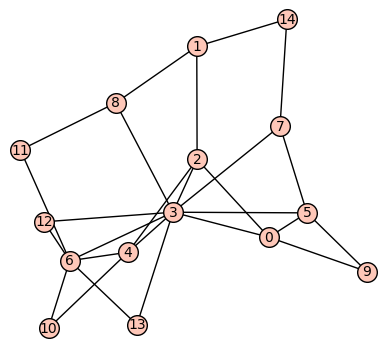

In [150]:
n,m=15,2;
g=graphs.RandomBarabasiAlbert(n,m)
g.show()

In [151]:
def findMaxDegAndItsVertex(gr):
    '''find the maximum degree in a graph and its vertex with smalelst ID'''
    maxD=0; maxDv=0;
    for vd in gr.degree_iterator(range(n),True):
        #print vd
        if vd[1] > maxD:
            maxD=vd[1]; maxDv=vd[0];
    return maxD,maxDv

In [152]:
findMaxDegAndItsVertex(g)

(9, 3)

(14, 10)


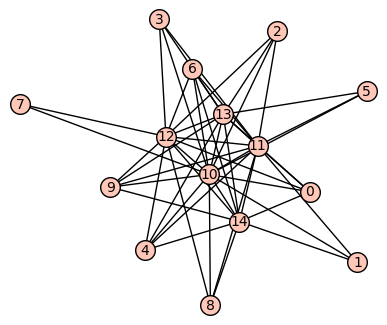

In [153]:
n,m=15,10;
g=graphs.RandomBarabasiAlbert(n,m)
print findMaxDegAndItsVertex(g)
g.show()

In [154]:
def PrefAttachmentFromMostPopular(n,m,reps):
    '''return reps many transmission trees from the preferential attachment model with initial infection
    from the smallest node with the maximum degree'''
    ts=[]
    for i in range(reps):
        g=graphs.RandomBarabasiAlbert(n,m)
        maxDV=findMaxDegAndItsVertex(g)
        ts.append(transmissionProcessTC(g.to_directed(),maxDV[1]))
    return ts

In [155]:
%time
# demo of the mle - way too long...
c_1 = lambda p: p[0]+0.9999999 # constraint for alpha > -1
c_2 = lambda p: p[1]+0.9999999 # constraint for beta > -1
# simulation settings
mles=[]
n,m,reps,repeatMLE=100,1,30,10
for i in range(repeatMLE):
    ts=PrefAttachmentFromMostPopular(n,m,reps)
    spc=splitPairsCounts(ts)
    def negLkl(AB):
        return negLogLkl_SplitPairCounts2(spc,AB[0],AB[1])
    mle=minimize_constrained(negLkl,[c_1,c_2],[0.0,0.0],disp=0)
    x = [i, n, m, reps, mle]
    print x
    mles.append(x)

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 8.11 µs


/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:40: RuntimeWarning: invalid value encountered in double_scalars
/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:42: RuntimeWarning: invalid value encountered in double_scalars
/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:43: RuntimeWarning: invalid value encountered in double_scalars


[0, 100, 1, 30, (1.3428422811045353, -6.652519660701506e-05)]
[1, 100, 1, 30, (1.3472200442741313, -2.1180058754524707e-05)]
[2, 100, 1, 30, (1.3905762214551378, -3.6150348048567476e-05)]
[3, 100, 1, 30, (1.3755215927169298, -5.259751542279883e-05)]
[4, 100, 1, 30, (1.3420810644561687, 3.0004787897066837e-05)]
[5, 100, 1, 30, (1.3743411444625635, -6.17009509131993e-05)]
[6, 100, 1, 30, (1.3762067278683339, -8.272383577451723e-05)]
[7, 100, 1, 30, (1.3258835517262164, 1.5253966286088854e-05)]
[8, 100, 1, 30, (1.3475269624702158, 7.243821022845532e-05)]
[9, 100, 1, 30, (1.3879390315711377, 4.168007357874693e-05)]


In [156]:
mles

[[0, 100, 1, 30, (1.3428422811045353, -6.652519660701506e-05)],
 [1, 100, 1, 30, (1.3472200442741313, -2.1180058754524707e-05)],
 [2, 100, 1, 30, (1.3905762214551378, -3.6150348048567476e-05)],
 [3, 100, 1, 30, (1.3755215927169298, -5.259751542279883e-05)],
 [4, 100, 1, 30, (1.3420810644561687, 3.0004787897066837e-05)],
 [5, 100, 1, 30, (1.3743411444625635, -6.17009509131993e-05)],
 [6, 100, 1, 30, (1.3762067278683339, -8.272383577451723e-05)],
 [7, 100, 1, 30, (1.3258835517262164, 1.5253966286088854e-05)],
 [8, 100, 1, 30, (1.3475269624702158, 7.243821022845532e-05)],
 [9, 100, 1, 30, (1.3879390315711377, 4.168007357874693e-05)]]

In [157]:
#########
#n,m,reps,repeatMLE=100,2,30,10
#mles=[[0, 100, 2, 30, (-0.22665379663514496, -0.6500365441924358)], [1, 100, 2, 30, (-0.25247638037582687, -0.6740522715490318)], [2, 100, 2, 30, (-0.27092350497911694, -0.6818376619669556)], [3, 100, 2, 30, (-0.20801219786250535, -0.6629331739317452)], [4, 100, 2, 30, (-0.20181548669784008, -0.6735625013240737)], [5, 100, 2, 30, (-0.21620078970637727, -0.6622066332612844)], [6, 100, 2, 30, (-0.2897399652564357, -0.667458689497513)], [7, 100, 2, 30, (-0.26265154465133816, -0.6386910379716887)], [8, 100, 2, 30, (-0.28873448085827796, -0.6603197512893558)], [9, 100, 2, 30, (-0.22625577133555644, -0.6756400458385884)]]
#mle mean and std-err
#[-0.2443, 0.03283, -0.6647, 0.01294]
##########
#n,m,reps,repeatMLE=100,1,30,10
#mles=[[0, 100, 1, 30, (-0.37414180696123656, -0.8290932447900436)], [1, 100, 1, 30, (-0.3236397755375402, -0.8314890535433167)], [2, 100, 1, 30, (-0.2468637183101474, -0.8042617935543253)], [3, 100, 1, 30, (-0.33050561419852764, -0.8159645696149106)], [4, 100, 1, 30, (-0.3070428692968694, -0.8171910942641389)], [5, 100, 1, 30, (-0.3930318773221692, -0.8290483487359996)], [6, 100, 1, 30, (-0.28123221418745825, -0.8123073810368434)], [7, 100, 1, 30, (-0.3861042546882455, -0.8353259786808699)], [8, 100, 1, 30, (-0.35248668135875144, -0.8321393837645847)], [9, 100, 1, 30, (-0.27975485700284897, -0.8080369576128273)]]
#mle mean and std-err
#[-0.3275, 0.04932, -0.8215, 0.01121]
y=mean([x[4][0] for x in mles]),std([x[4][0] for x in mles]), mean([x[4][1] for x in mles]),std([x[4][1] for x in mles]); [x.n(digits=4) for x in y]

[1.361, 0.02239, -0.00001615, 0.00005282]

In [158]:
%time
# demo of the mle - way too long...
c_1 = lambda p: p[0]+0.9999999 # constraint for alpha > -1
c_2 = lambda p: p[1]+0.9999999 # constraint for beta > -1
# simulation settings
mles=[]
n,m=100,2
reps=30
repeatMLE=10
for i in range(repeatMLE):
    ts=[transmissionProcessTC(graphs.RandomBarabasiAlbert(n,m).to_directed(),0)  for _ in range(reps)]
    spc=splitPairsCounts(ts)
    def negLkl(AB):
        return negLogLkl_SplitPairCounts2(spc,AB[0],AB[1])
    mle=minimize_constrained(negLkl,[c_1,c_2],[0.0,0.0],disp=0)
    x = [i, n, m, reps, mle]
    print x
    mles.append(x)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs


/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:40: RuntimeWarning: invalid value encountered in double_scalars
/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:42: RuntimeWarning: invalid value encountered in double_scalars
/home/raaz/all/software/sage/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:43: RuntimeWarning: invalid value encountered in double_scalars


[0, 100, 2, 30, (1.3096105845463908, -4.8348819637574485e-05)]
[1, 100, 2, 30, (1.270253655658064, 5.9688811131104736e-06)]
[2, 100, 2, 30, (1.3332622438123358, -1.2016098580753547e-05)]
[3, 100, 2, 30, (1.2949060290054708, -6.600533313520576e-05)]
[4, 100, 2, 30, (1.3341946755567011, -5.607240977925913e-05)]
[5, 100, 2, 30, (1.3246092735535613, 3.0558983047153664e-05)]
[6, 100, 2, 30, (1.359535692494188, -8.754965792235185e-05)]
[7, 100, 2, 30, (1.3279175104980268, -8.480573835037414e-05)]
[8, 100, 2, 30, (1.3205227464213074, 1.2001454069719903e-05)]
[9, 100, 2, 30, (1.302956101292145, -7.511030417654103e-06)]


Drawing some figures

In [159]:
n,m=25,1
H = graphs.RandomBarabasiAlbert(n,m)
H.set_latex_options(
   graphic_size=(8,8),
   vertex_size=0.1,
   edge_thickness=0.04,
   edge_color='green',
   vertex_color='green',
   vertex_label_color='red',
   format='tkz_graph',
   tkz_style='Art',
   #layout='acyclic'
   )
view(H)

In [160]:
maxDV=findMaxDegAndItsVertex(H)
print maxDV
T=transmissionProcessTC(H.to_directed(),maxDV[1])

(10, 1)


In [162]:
print ascii_art(T)

                                                                                    ___________1_____________
                                                                                   /                        /    
                                                                __________________2___________________     16_
                                                               /                                     /    /  /  
                                                 _____________3_______________                      i23  i8 i21
                                                /                            /                          
                                      _________4___________           ______13______                    
                                     /                    /          /             /                    
                              ______5________         ___7_____     17_     ______20_______             
                    

In [0]:
#latex(H)

In [0]:
#latex(T)